# Семинар 5

## Решение стационарного уравнения Шредингера в одномерной потенциальной яме

Стационарное одномерное уравнение Шредингера:
$$ \frac{d^2\psi(x)}{dx^2} + \frac{2m(E - U(x))}{\hbar^2} \psi(x) = 0 $$
где $\psi(x)$ - волновая функция, $m$ и $E$ - масса и энергия частицы, $V(x)$ - потенциал, $\hbar$ - приведенная постоянная планка. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math
import warnings
warnings.filterwarnings("ignore")

### 1. Частица в бесконечно глубокой потенциальной яме

В простейшем случае бесконечно глубокой потенциальной ямы легко получить аналитическое решение для уровней энергии частицы. 

$$ U(x) = \begin{cases} 0, & 0 < x < L \\ +\infty, & x < 0, L < x  \end{cases} $$  

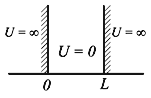

В области бесконечно большого потенциала волновая функция должна быть равна нулю $\psi(x) = 0$.

Внутри ямы получаем уравнение: 
$$ \psi(x)'' + \kappa^2 \psi(x) = 0$$
где $\kappa = \sqrt{2mE/\hbar^2}$. Общее решение этого уравнения: $$\psi(x) = A \sin(\kappa x) + B \cos(\kappa x) $$, где $A$ и $B$ произвольные константы.

Поскольку волновая функция должна быть непрерывна при всех значениях $x$, то получаем граничные условия:
$$\psi(0) = 0 \\ \psi(L) = 0 $$

Из первого условия получаем $B = 0$, а из второго - $\sin(\kappa L) = 0$. Это приволит к тому, что решение может существовать лишь при определенных значеиях энергии:
$$ E_n  = \frac{n^2 \pi^2  \hbar^2}{ 2 m L^2} $$



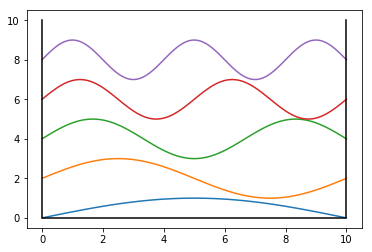

In [2]:
#Построить волновые функции соответствующие нескольким первым уровням энергии 
#Задание 1. Напишите функцию get_kappa

def get_kappa(N, L = 1):
    "Функция принимает N - количество уровней для вывода, L - ширину ямы"
    "Возвращает массив np.arrange из элементов kappa"
    
    return kappa

def plot_wavefunctions_endless(N, L = 1):
    kappa = get_kappa(N, L)
    x = np.linspace(0, L, num=100)
    for i in range(N):
        plt.plot(x, np.sin(kappa[i]*x)+2*i)
    plt.plot([0,0,L,L],[2*N,0,0,2*N], 'k')
    plt.show()


plot_wavefunctions_endless(N=5, L=10)

### 2. Частица в прямоугольной потенциальной яме

Рассмотрим случай прямоугольной потенциалльной ямы конечной глубины и найдем уровни энергии в ней. 

$$ U(x) = \begin{cases}  V_0, &  x < - L/2 & \text{область I} \\ 0, & -L/2 < x < L/2 & \text{область II} \\ V_0, &  L/2 < x & \text{область III}   \end{cases} $$  

#### 2.1 $E > V_0$
Если энергия частиц больше высоты стенок - то частица является пролетной, энергетический спектор таких частиц непрерывен.
$$ \psi(x)'' + \kappa^2 \psi(x) = 0 \qquad \text{ - в области II} $$
$$ \psi(x)'' + k^2 \psi(x) = 0 \qquad  \text{ - в области I и III} $$
где $\kappa = \sqrt{2mE/\hbar^2}$ и $k = \sqrt{2m(E-V_0)/\hbar^2}$. Решением этих уравнений является комбинация синусов и косиносов с частотами $\kappa$ и $k$ внутри и вне ямы соответвенно. На границах ямы волновая функцияи её первая производная должны быть непрерывны.


#### 2.2 $E < V_0$
Если энергия частицы $E < V_0$, то уравнения 
$$ \psi(x)'' + \kappa^2 \psi(x) = 0 \qquad  \text{ - в области II} $$
$$ \psi(x)'' - \alpha^2 \psi(x) = 0 \qquad  \text{ - в области I и III} $$
где $\kappa = \sqrt{2mE/\hbar^2}$ и $\alpha = \sqrt{2m(V_0 - E)/\hbar^2}$. 

Общие решения уравнений: 
$$ \psi_1(x) = С_+ e^{\alpha x} + C_- e^{-\alpha x} \qquad \text{ - в области I} $$
$$ \psi_2(x) = A \sin(\kappa x) + B \cos(\kappa x) \qquad \text{ - в области II} $$
$$ \psi_3(x) = D_+ e^{\alpha x} + D_- e^{-\alpha x} \qquad \text{ - в области III} $$
Для нахождения коэффициентов, во-первых, заметим, что для области $I$: $C_- = 0$ и для области $III$: $D_+ = 0$ из условия конечности волновой функции.

Во-вторых, на границе потенциальной ямы волновая функция должна быть непрерывная и гладкая:
$$ \psi_1(-L/2) = \psi_2(-L/2), \qquad \psi_2(L/2) = \psi_3(L/2) $$
$$ \frac{d\psi_1}{dx}(-L/2) = \frac{d\psi_2}{dx}(-L/2), \qquad \frac{d\psi_2}{dx}(L/2) = \frac{d\psi_3}{dx}(L/2) $$

Эти уравнения приводят к двум типам решений - симметричному, когда $A = 0$ и $C_- = D_+$, и антисимметричному, когда $B = 0$ и $C_- = -D_+$. 

В итоге, получается два уравнения для существования решения, в симметричном случае:
$$ \kappa \tan(\kappa L/2) = \alpha $$ 
и в антиссимметричном:
$$ \kappa \cot(\kappa L/2) = - \alpha $$ 

Заметим, что $\alpha = \sqrt{2mV_0/\hbar^2 - \kappa^2}$, а также сделаем замены 
$$ v = \kappa L/2, \qquad  u_0 = \sqrt{2mV_0/\hbar^2} L /2, \qquad u = \alpha L/2$$

Тогда уравнения перепишутся в виде:
$$ \sqrt{u_0^2 - v^2} = v \tan(v) $$ 
$$ \sqrt{u_0^2 - v^2} = -v \cot(v)  $$ 

In [3]:
def peretty_fun(f, x, tol):
    y = f(x)
    y[y > tol] = np.nan
    y[y < -tol] = np.nan
    return y

def plot_shr(u0):
    "Функция строит график левой и правой части уравнений для v"
    v = np.linspace(0, 2*u0, 10000)

    ax = plt.axes()
    ax.plot(v[v<u0], np.sqrt(u0**2 - v[v<u0]**2))
    ax.plot(v, v*peretty_fun(np.tan, v, 3*u0))
    ax.plot(v, -v*peretty_fun(lambda x: 1/np.tan(x), v, 3*u0))
    ax.set_aspect('equal')
    ax.set(ylim = (0, 1.5*u0), xlim = (0,2*u0))
    plt.show()

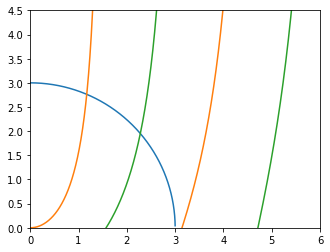

In [4]:
# Задание 2. Попробуйте различные значения u0, исследуйте как меняется график от этого параметра. 
# Разберитесь как работает функция plot_shr и для чего нужна peretty_fun()

plot_shr(u0=3)

In [6]:
# Задание 3. Используя запрограммированный вами метод итерационных приближений или библиотечную функцию 
# (например, brentq() из scipy.optimize) найти значения корней уравнений на v
   
def get_v(u0):
    "Функция принимает u0, и возвращает все корни уравнений на v"
    "Возвращает вектор np.aaray v из корней уровнения"

    return v
    

In [7]:
def plot_wavefunctions(U0, L):
    "Функция строит график волновых функций для потенциала высоты U0 = sqrt(2mV0/h^2) и ширины L"
    u0 = np.sqrt(U0)*L/2
    v = get_v(u0)
    kappa = v * 2 / L
    alpha = np.sqrt(V0 - kappa**2)
    
    m = 1.25
    x1 = np.linspace(-m*L, -L/2)
    x2 = np.linspace(-L/2, L/2)
    x3 = np.linspace(L/2, m*L)
    x = np.concatenate([x1, x2, x3])
    
    for i in range(v.size):
        if(i%2):
            f2 = np.sin(kappa[i]*x2)
        else:
            f2 = np.cos(kappa[i]*x2)
        f1 = np.exp(alpha[i]*x1)
        f1 = f1 * f2[0] / f1[-1]
        f3 = np.exp(-alpha[i]*x3)
        f3 = f3 * f2[-1] / f3[0]
        f = np.concatenate([f1, f2, f3])
        plt.plot(x, f+2*i)
    
    N = v.shape[0]
    plt.plot([-m*L,-L/2,-L/2,L/2,L/2,m*L],[2*N,2*N,0,0,2*N,2*N], 'k')
    plt.show()
    

In [ ]:
# Построить соответствующие волновые функции
# Разберитесь, как работает функция plot_wavefunctions()
plot_wavefunctions(U0=10, L=4)

### 3. Частица в гравитационном поле

Найти уровни энергии и волновые функции стоционарных состояний частицы в однородном поле тяжести, при условии что движение ограничено синзу идеально отрожающей плоскостью. 

В таком случае потенциал в котором решается уравнение шредингера имеет вид
$$ U(x) = \begin{cases}  mgx, &  x > 0 \\ +\infty, & x<0\end{cases} $$  

Формулы для решения задачи можно посмотреть например в "Задачи по квантовой механике" Галицкий, Корнаков, Коган, задача 2.15 и 2.29